In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Cost function in pure Python(no tensor)

In [6]:
x = np.array([1,2,3])
y = np.array([1,2,3])

In [7]:
def cost_func(w,x,y):
    c = 0
    for i in range(len(x)):
        c += (w * x[i] - y[i]) ** 2
    return c / len(x)

In [12]:
list_w = []
list_cost = []
for feed_w in np.linspace(-3,5,num=15): # -3,5까지 15개의 구간값.
    curr_cost = cost_func(feed_w,x,y)
    print('{:6.3f} | {:10.5f}'.format(feed_w,curr_cost))
    list_w.append(feed_w)
    list_cost.append(curr_cost)

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


<AxesSubplot:>

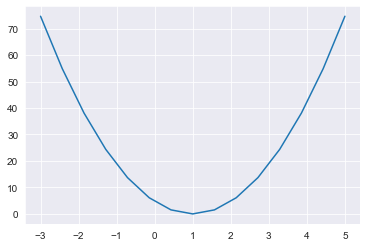

In [20]:
sns.set_style('darkgrid')
sns.lineplot(x=list_w,y=list_cost)

# Cost function in Tensorflow

In [31]:
x = np.array([1,2,3])
y = np.array([1,2,3])

def cost_func(w,x,y):
    hypothesis = w*x
    return tf.reduce_mean(tf.square(hypothesis - y))

w_values = np.linspace(-3,5,num=15)
cost_values = []

for feed_w in w_values:
    curr_cost = cost_func(feed_w,x,y)
    cost_values.append(curr_cost.numpy())
    print("{:6.3f} | {:10.5f}".format(feed_w,curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


<AxesSubplot:>

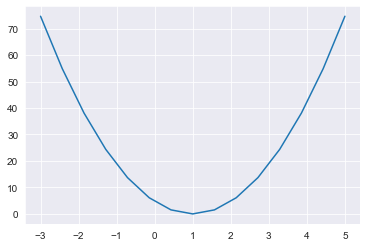

In [32]:
sns.lineplot(x=w_values,y=cost_values)

# Gradient descent in tensorflow

In [98]:
tf.random.set_seed(0) # for reproducibility

x_data = [1.,2.,3.,4.]
y_data = [1.,3.,5.,7.]

W = tf.Variable(tf.random.normal([1],-100.,100.))

cost_one = []
w_one = []
for step in range(300):
    hypothesis = W * x_data
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    
    alpha = 0.01
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W,x_data) - y_data,x_data))
    descent = W - tf.multiply(alpha, gradient)
    W.assign(descent)
    cost_one.append(cost.numpy())
    w_one.append(W.numpy()[0])
    
    if step % 10 == 0:
        print('{:5} | {:10.4f} | {:10.6f}'.format(step,cost.numpy(),W.numpy()[0]))

    0 | 18332.2188 |  47.398293
   10 |  3855.3564 |  22.638384
   20 |   810.9046 |  11.283927
   30 |   170.6631 |   6.076973
   40 |    36.0217 |   3.689155
   50 |     7.7069 |   2.594144
   60 |     1.7524 |   2.091991
   70 |     0.5001 |   1.861713
   80 |     0.2368 |   1.756112
   90 |     0.1814 |   1.707684
  100 |     0.1698 |   1.685477
  110 |     0.1673 |   1.675292
  120 |     0.1668 |   1.670622
  130 |     0.1667 |   1.668481
  140 |     0.1667 |   1.667498
  150 |     0.1667 |   1.667048
  160 |     0.1667 |   1.666842
  170 |     0.1667 |   1.666747
  180 |     0.1667 |   1.666703
  190 |     0.1667 |   1.666684
  200 |     0.1667 |   1.666674
  210 |     0.1667 |   1.666670
  220 |     0.1667 |   1.666668
  230 |     0.1667 |   1.666667
  240 |     0.1667 |   1.666667
  250 |     0.1667 |   1.666667
  260 |     0.1667 |   1.666667
  270 |     0.1667 |   1.666667
  280 |     0.1667 |   1.666667
  290 |     0.1667 |   1.666667


In [99]:
tf.random.set_seed(0) # for reproducibility

x_data = [1.,2.,3.,4.]
y_data = [1.,3.,5.,7.]

W = tf.Variable([5.])

cost_five = []
w_five = []
for step in range(300):
    hypothesis = W * x_data
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    
    alpha = 0.01
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W,x_data) - y_data,x_data))
    descent = W - tf.multiply(alpha, gradient)
    W.assign(descent)
    cost_five.append(cost.numpy())
    w_five.append(W.numpy()[0])
    
    if step % 10 == 0:
        print('{:5} | {:10.4f} | {:10.6f}'.format(step,cost.numpy(),W.numpy()[0]))

    0 |    83.5000 |   4.750000
   10 |    17.6915 |   3.080629
   20 |     3.8521 |   2.315085
   30 |     0.9417 |   1.964020
   40 |     0.3297 |   1.803027
   50 |     0.2009 |   1.729199
   60 |     0.1739 |   1.695343
   70 |     0.1682 |   1.679817
   80 |     0.1670 |   1.672697
   90 |     0.1667 |   1.669432
  100 |     0.1667 |   1.667935
  110 |     0.1667 |   1.667248
  120 |     0.1667 |   1.666933
  130 |     0.1667 |   1.666789
  140 |     0.1667 |   1.666723
  150 |     0.1667 |   1.666692
  160 |     0.1667 |   1.666678
  170 |     0.1667 |   1.666672
  180 |     0.1667 |   1.666669
  190 |     0.1667 |   1.666668
  200 |     0.1667 |   1.666667
  210 |     0.1667 |   1.666667
  220 |     0.1667 |   1.666667
  230 |     0.1667 |   1.666667
  240 |     0.1667 |   1.666667
  250 |     0.1667 |   1.666667
  260 |     0.1667 |   1.666667
  270 |     0.1667 |   1.666667
  280 |     0.1667 |   1.666667
  290 |     0.1667 |   1.666667
